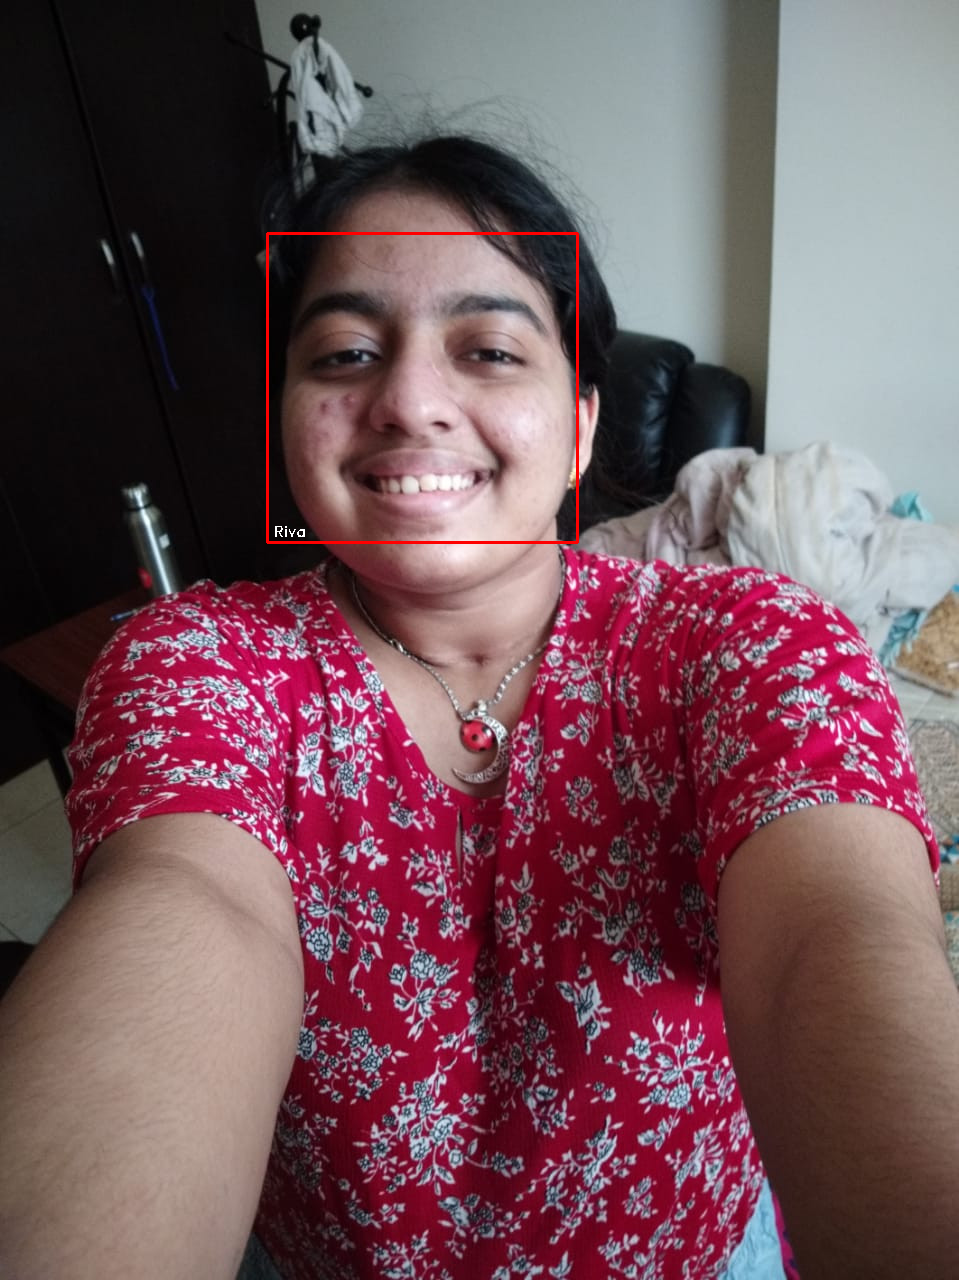

In [9]:
import dlib
import cv2
from google.colab.patches import cv2_imshow
import os
import numpy as np

known_encodings = []
known_names = []

data_folder = '/content/drive/MyDrive/Colab Notebooks/Family Pictures'

shape_predictor = dlib.shape_predictor("/content/drive/MyDrive/Colab Notebooks/Family Pictures/shape_predictor_68_face_landmarks.dat")

for person_name in os.listdir(data_folder):
    person_folder = os.path.join(data_folder, person_name)
    if os.path.isdir(person_folder):
        for filename in os.listdir(person_folder):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(person_folder, filename)
                image = cv2.imread(image_path)
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                detector = dlib.get_frontal_face_detector()
                faces = detector(gray)

                if len(faces) == 1:
                    landmarks = shape_predictor(gray, faces[0])

                    face_descriptor = np.array([p.x for p in landmarks.parts()] + [p.y for p in landmarks.parts()])
                    known_encodings.append(face_descriptor)
                    known_names.append(person_name)

test_image_path = '/content/drive/MyDrive/Colab Notebooks/Family Pictures/TestImage.jpg'
test_image = cv2.imread(test_image_path)
test_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)

detector = dlib.get_frontal_face_detector()
faces = detector(test_gray)

for face in faces:
    landmarks = shape_predictor(test_gray, face)

    face_descriptor = np.array([p.x for p in landmarks.parts()] + [p.y for p in landmarks.parts()])

    matches = []
    for known_encoding in known_encodings:
        match = np.linalg.norm(known_encoding - face_descriptor)
        matches.append(match)

    name = "Unknown"

    if min(matches) < 0.6:
        index = matches.index(min(matches))
        name = known_names[index]

    (left, top, right, bottom) = (face.left(), face.top(), face.right(), face.bottom())
    cv2.rectangle(test_image, (left, top), (right, bottom), (0, 0, 255), 2)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(test_image, name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)

cv2_imshow(test_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
